In [74]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [75]:
covid_data_path = "resources/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time_-_ARCHIVED.csv"
state_code_path = "resources/US-2-letter-state-code.csv"

# Read the mouse data and the study results
covid_data_df = pd.read_csv(covid_data_path)

state_code_df = pd.read_csv(state_code_path)


covid_data_df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,03/11/2021,KS,297229,241035.0,56194.0,0,0.0,4851,NaN,NaN,0,0.0,03/12/2021 03:20:13 PM,Agree,NaN
1,12/01/2021,ND,163565,135705.0,27860.0,589,220.0,1907,NaN,NaN,9,0.0,12/02/2021 02:35:20 PM,Agree,Not agree
2,01/02/2022,AS,11,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,01/03/2022 03:18:16 PM,NaN,NaN
3,11/22/2021,AL,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0,11/22/2021 12:00:00 AM,Agree,Agree
4,05/30/2022,AK,251425,NaN,NaN,0,0.0,1252,NaN,NaN,0,0.0,05/31/2022 01:20:20 PM,NaN,NaN


In [76]:
clean_df = covid_data_df.drop(columns=["created_at", "consent_cases", "consent_deaths"])
clean_df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death
0,03/11/2021,KS,297229,241035.0,56194.0,0,0.0,4851,NaN,NaN,0,0.0
1,12/01/2021,ND,163565,135705.0,27860.0,589,220.0,1907,NaN,NaN,9,0.0
2,01/02/2022,AS,11,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0
3,11/22/2021,AL,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0
4,05/30/2022,AK,251425,NaN,NaN,0,0.0,1252,NaN,NaN,0,0.0


In [77]:
clean_df = clean_df.rename(columns={"submission_date":"Submission Date", "state":"State", "tot_cases":"Total Cases",
                        "conf_cases":"Confirmed Cases", "prob_cases":"Probable Cases", "new_case":"New Cases",
                        "pnew_case":"Probable New Cases", "tot_death":"Total Deaths", "conf_death":"Confirmed Deaths",
                        "prob_death": "Probable Deaths", "new_death":"New Deaths", "pnew_death":"Probable New Deaths"})
clean_df.head()

,Submission Date,State,Total Cases,Confirmed Cases,Probable Cases,New Cases,Probable New Cases,Total Deaths,Confirmed Deaths,Probable Deaths,New Deaths,Probable New Deaths
0,03/11/2021,KS,297229,241035.0,56194.0,0,0.0,4851,NaN,NaN,0,0.0
1,12/01/2021,ND,163565,135705.0,27860.0,589,220.0,1907,NaN,NaN,9,0.0
2,01/02/2022,AS,11,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0
3,11/22/2021,AL,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0
4,05/30/2022,AK,251425,NaN,NaN,0,0.0,1252,NaN,NaN,0,0.0


In [78]:
clean_df = clean_df.dropna(how='any')
clean_df

,Submission Date,State,Total Cases,Confirmed Cases,Probable Cases,New Cases,Probable New Cases,Total Deaths,Confirmed Deaths,Probable Deaths,New Deaths,Probable New Deaths
3,11/22/2021,AL,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0
5,05/17/2020,RMI,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0
7,09/04/2021,PR,173967,144788.0,29179.0,667,274.0,2911,2482.0,429.0,8,3.0
10,01/01/2022,UT,636992,636992.0,0.0,0,0.0,3787,3635.0,152.0,0,0.0
12,04/03/2021,OH,1024011,866822.0,157189.0,2293,552.0,18646,18646.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
60044,09/04/2022,MS,913049,492258.0,420791.0,0,0.0,12794,8425.0,4369.0,0,0.0
60046,02/20/2020,AL,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0
60048,09/25/2021,RMI,4,4.0,0.0,0,0.0,0,0.0,0.0,0,0.0
60058,06/17/2020,MS,24223,24038.0,185.0,521,6.0,1191,1172.0,19.0,9,0.0


In [79]:
clean_df['State'] = clean_df['State'].replace({'NYC': 'NY'})
clean_df

,Submission Date,State,Total Cases,Confirmed Cases,Probable Cases,New Cases,Probable New Cases,Total Deaths,Confirmed Deaths,Probable Deaths,New Deaths,Probable New Deaths
3,11/22/2021,AL,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0
5,05/17/2020,RMI,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0
7,09/04/2021,PR,173967,144788.0,29179.0,667,274.0,2911,2482.0,429.0,8,3.0
10,01/01/2022,UT,636992,636992.0,0.0,0,0.0,3787,3635.0,152.0,0,0.0
12,04/03/2021,OH,1024011,866822.0,157189.0,2293,552.0,18646,18646.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
60044,09/04/2022,MS,913049,492258.0,420791.0,0,0.0,12794,8425.0,4369.0,0,0.0
60046,02/20/2020,AL,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0
60048,09/25/2021,RMI,4,4.0,0.0,0,0.0,0,0.0,0.0,0,0.0
60058,06/17/2020,MS,24223,24038.0,185.0,521,6.0,1191,1172.0,19.0,9,0.0


In [80]:
# consider the list

filtered_df = clean_df[(clean_df['State'] != "AS") & (clean_df['State'] != "RMI") &
                      (clean_df['State'] != "PR") & (clean_df['State'] != "PW") & 
                      (clean_df['State'] != "GU") & (clean_df['State'] != "MP") &
                      (clean_df['State'] != "FSM") & (clean_df['State'] != "VI")]
filtered_df



,Submission Date,State,Total Cases,Confirmed Cases,Probable Cases,New Cases,Probable New Cases,Total Deaths,Confirmed Deaths,Probable Deaths,New Deaths,Probable New Deaths
3,11/22/2021,AL,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0
10,01/01/2022,UT,636992,636992.0,0.0,0,0.0,3787,3635.0,152.0,0,0.0
12,04/03/2021,OH,1024011,866822.0,157189.0,2293,552.0,18646,18646.0,0.0,0,0.0
13,10/16/2022,NY,2908749,2452178.0,456571.0,5934,1266.0,42158,36503.0,5655.0,8,-1.0
19,07/26/2021,OK,475578,373929.0,101649.0,1028,264.0,7488,6379.0,1109.0,8,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
60038,04/17/2021,AL,521608,407075.0,114533.0,258,75.0,11110,8878.0,2232.0,7,2.0
60044,09/04/2022,MS,913049,492258.0,420791.0,0,0.0,12794,8425.0,4369.0,0,0.0
60046,02/20/2020,AL,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0
60058,06/17/2020,MS,24223,24038.0,185.0,521,6.0,1191,1172.0,19.0,9,0.0


In [81]:
filtered_df["Submission Date"].sort_values(ascending=True)

sorted_date_df = filtered_df.sort_values("Submission Date", ascending=True)
sorted_date_df

,Submission Date,State,Total Cases,Confirmed Cases,Probable Cases,New Cases,Probable New Cases,Total Deaths,Confirmed Deaths,Probable Deaths,New Deaths,Probable New Deaths
16101,01/01/2021,WI,522523,483007.0,39516.0,2085,180.0,5254,4869.0,385.0,12,2.0
31377,01/01/2021,OR,113909,112189.0,1720.0,0,0.0,1477,1462.0,15.0,0,0.0
19276,01/01/2021,IL,963389,963389.0,0.0,0,0.0,18173,16647.0,1526.0,195,38.0
57083,01/01/2021,OH,700380,628336.0,72044.0,0,0.0,8962,8112.0,850.0,0,0.0
29461,01/01/2021,MT,81555,81555.0,0.0,0,0.0,961,961.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
47538,12/31/2021,MA,1140614,1059963.0,80651.0,22703,1306.0,20273,19821.0,452.0,52,4.0
9900,12/31/2021,AL,904460,664885.0,239575.0,6759,1651.0,16754,13017.0,3737.0,11,1.0
29548,12/31/2021,NJ,1564253,1344763.0,219490.0,33724,5273.0,29037,26188.0,2849.0,37,0.0
46704,12/31/2021,CO,957696,875714.0,81982.0,13650,1081.0,10271,9089.0,1182.0,31,6.0


In [82]:
state_code_df =  state_code_df.rename(columns={"state_name":"State Name", "state_code":"State"}) 
state_code_df.head()

,State Name,State
0,Alabama,AL
1,Alaska,AK
2,American Samoa,AS
3,Arizona,AZ
4,Arkansas,AR


In [83]:
data = {
    'State Name': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 
              'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 
              'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 
              'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 
              'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 
              'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 
              'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
    'State Color': ['Red', 'Red', 'Blue', 'Red', 'Blue', 'Blue', 'Blue', 'Blue', 'Blue', 'Blue', 'Blue', 
              'Red', 'Blue', 'Red', 'Red', 'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue', 'Blue',
              'Blue', 'Red', 'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue', 'Blue', 'Blue', 'Blue',
              'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue', 'Red', 'Red', 'Red', 'Red', 'Red',
              'Blue', 'Blue', 'Blue', 'Red', 'Blue', 'Red']
}
    
    
state_color_df = pd.DataFrame(data)
state_color_df.head()

,State Name,State Color
0,Alabama,Red
1,Alaska,Red
2,Arizona,Blue
3,Arkansas,Red
4,California,Blue


In [84]:
temp_state_df = pd.merge(state_color_df, state_code_df,
                                 how='left', on='State Name')
temp_state_df.head()

,State Name,State Color,State
0,Alabama,Red,AL
1,Alaska,Red,AK
2,Arizona,Blue,AZ
3,Arkansas,Red,AR
4,California,Blue,CA


In [85]:
final_df = pd.merge(sorted_date_df, temp_state_df,
                                 how='left', on='State')
final_df

,Submission Date,State,Total Cases,Confirmed Cases,Probable Cases,New Cases,Probable New Cases,Total Deaths,Confirmed Deaths,Probable Deaths,New Deaths,Probable New Deaths,State Name,State Color
0,01/01/2021,WI,522523,483007.0,39516.0,2085,180.0,5254,4869.0,385.0,12,2.0,Wisconsin,Blue
1,01/01/2021,OR,113909,112189.0,1720.0,0,0.0,1477,1462.0,15.0,0,0.0,Oregon,Blue
2,01/01/2021,IL,963389,963389.0,0.0,0,0.0,18173,16647.0,1526.0,195,38.0,Illinois,Blue
3,01/01/2021,OH,700380,628336.0,72044.0,0,0.0,8962,8112.0,850.0,0,0.0,Ohio,Red
4,01/01/2021,MT,81555,81555.0,0.0,0,0.0,961,961.0,0.0,0,0.0,Montana,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24099,12/31/2021,MA,1140614,1059963.0,80651.0,22703,1306.0,20273,19821.0,452.0,52,4.0,Massachusetts,Blue
24100,12/31/2021,AL,904460,664885.0,239575.0,6759,1651.0,16754,13017.0,3737.0,11,1.0,Alabama,Red
24101,12/31/2021,NJ,1564253,1344763.0,219490.0,33724,5273.0,29037,26188.0,2849.0,37,0.0,New Jersey,Blue
24102,12/31/2021,CO,957696,875714.0,81982.0,13650,1081.0,10271,9089.0,1182.0,31,6.0,Colorado,Blue


In [86]:
final2_df = final_df.drop(columns=["State"])
final2_df

,Submission Date,Total Cases,Confirmed Cases,Probable Cases,New Cases,Probable New Cases,Total Deaths,Confirmed Deaths,Probable Deaths,New Deaths,Probable New Deaths,State Name,State Color
0,01/01/2021,522523,483007.0,39516.0,2085,180.0,5254,4869.0,385.0,12,2.0,Wisconsin,Blue
1,01/01/2021,113909,112189.0,1720.0,0,0.0,1477,1462.0,15.0,0,0.0,Oregon,Blue
2,01/01/2021,963389,963389.0,0.0,0,0.0,18173,16647.0,1526.0,195,38.0,Illinois,Blue
3,01/01/2021,700380,628336.0,72044.0,0,0.0,8962,8112.0,850.0,0,0.0,Ohio,Red
4,01/01/2021,81555,81555.0,0.0,0,0.0,961,961.0,0.0,0,0.0,Montana,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24099,12/31/2021,1140614,1059963.0,80651.0,22703,1306.0,20273,19821.0,452.0,52,4.0,Massachusetts,Blue
24100,12/31/2021,904460,664885.0,239575.0,6759,1651.0,16754,13017.0,3737.0,11,1.0,Alabama,Red
24101,12/31/2021,1564253,1344763.0,219490.0,33724,5273.0,29037,26188.0,2849.0,37,0.0,New Jersey,Blue
24102,12/31/2021,957696,875714.0,81982.0,13650,1081.0,10271,9089.0,1182.0,31,6.0,Colorado,Blue


In [122]:
final2_df["Blue Cases"] = final2_df["Total Cases"]
final2_df["Red Cases"] = final2_df["Total Cases"]

final2_df.loc[final2_df['State Color'] == "Red", 'Blue Cases'] = 0
final2_df.loc[final2_df['State Color'] == "Blue", 'Red Cases'] = 0




In [123]:
final2_df

,Submission Date,Total Cases,Confirmed Cases,Probable Cases,New Cases,Probable New Cases,Total Deaths,Confirmed Deaths,Probable Deaths,New Deaths,Probable New Deaths,State Name,State Color,Blue Cases,Red Cases
0,01/01/2021,522523,483007.0,39516.0,2085,180.0,5254,4869.0,385.0,12,2.0,Wisconsin,Blue,522523,0
1,01/01/2021,113909,112189.0,1720.0,0,0.0,1477,1462.0,15.0,0,0.0,Oregon,Blue,113909,0
2,01/01/2021,963389,963389.0,0.0,0,0.0,18173,16647.0,1526.0,195,38.0,Illinois,Blue,963389,0
3,01/01/2021,700380,628336.0,72044.0,0,0.0,8962,8112.0,850.0,0,0.0,Ohio,Red,0,700380
4,01/01/2021,81555,81555.0,0.0,0,0.0,961,961.0,0.0,0,0.0,Montana,Red,0,81555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24099,12/31/2021,1140614,1059963.0,80651.0,22703,1306.0,20273,19821.0,452.0,52,4.0,Massachusetts,Blue,1140614,0
24100,12/31/2021,904460,664885.0,239575.0,6759,1651.0,16754,13017.0,3737.0,11,1.0,Alabama,Red,0,904460
24101,12/31/2021,1564253,1344763.0,219490.0,33724,5273.0,29037,26188.0,2849.0,37,0.0,New Jersey,Blue,1564253,0
24102,12/31/2021,957696,875714.0,81982.0,13650,1081.0,10271,9089.0,1182.0,31,6.0,Colorado,Blue,957696,0


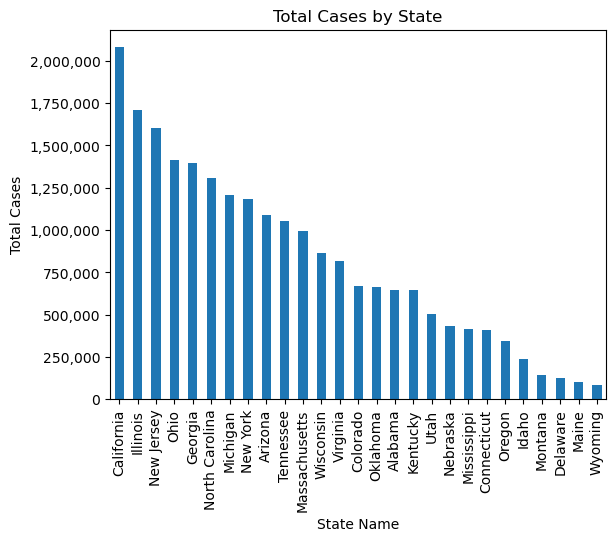

In [68]:
mean_final = final2_df.groupby("State Name").mean(numeric_only=True)["Total Cases"]
mean_final_df = mean_final.sort_values(ascending=False)


# x = mean_final_df["State Name"]
# y = mean_final_df["Total Cases"]

# plt.bar(x=x, y=y, color = 'blue')
# plt.show()



mean_final_df.plot(kind = "bar",
                    xlabel="State Name",
                    ylabel="Total Cases",
                     title="Total Cases by State")



plt.gca().yaxis.set_major_formatter('{:,.0f}'.format)

plt.show()


In [48]:
red_states_df = final2_df[final2_df["State Color"]=='Red']
red_states_df


,Submission Date,Total Cases,Confirmed Cases,Probable Cases,New Cases,Probable New Cases,Total Deaths,Confirmed Deaths,Probable Deaths,New Deaths,Probable New Deaths,State Name,State Color
3,01/01/2021,700380,628336.0,72044.0,0,0.0,8962,8112.0,850.0,0,0.0,Ohio,Red
4,01/01/2021,81555,81555.0,0.0,0,0.0,961,961.0,0.0,0,0.0,Montana,Red
5,01/01/2021,365618,298117.0,67501.0,3621,335.0,7273,5981.0,1292.0,83,19.0,Alabama,Red
10,01/01/2021,279722,279722.0,0.0,3110,0.0,1278,1252.0,26.0,9,1.0,Utah,Red
11,01/01/2021,585072,514429.0,70643.0,9159,1920.0,6907,5990.0,917.0,97,30.0,Tennessee,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24089,12/31/2021,708938,530961.0,177977.0,0,0.0,11555,8792.0,2763.0,0,0.0,Oklahoma,Red
24091,12/31/2021,543737,309859.0,233878.0,0,0.0,10450,6993.0,3457.0,0,0.0,Mississippi,Red
24092,12/31/2021,636992,636992.0,0.0,0,0.0,3787,3635.0,152.0,0,0.0,Utah,Red
24093,12/31/2021,342939,252799.0,90140.0,2107,930.0,3341,2783.0,558.0,0,0.0,Nebraska,Red


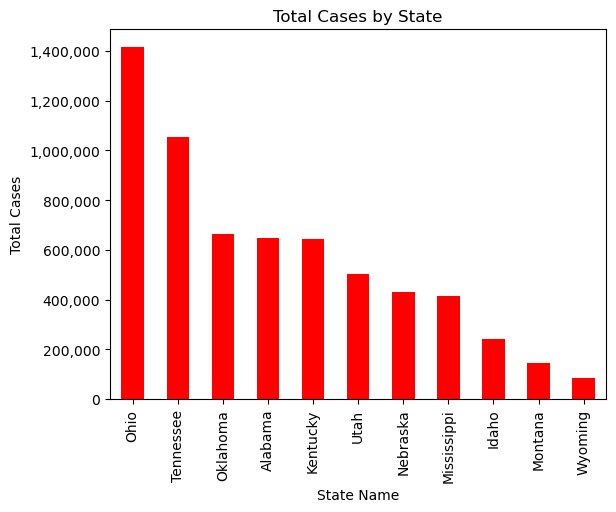

In [49]:
red_states_2 = red_states_df.groupby("State Name").mean(numeric_only=True)["Total Cases"]

red_states_mean = red_states_2.sort_values(ascending=False)

red_states_mean.plot(kind = "bar",
                    xlabel="State Name",
                    ylabel="Total Cases",
                     title="Total Cases by State",
                    color="r")

plt.gca().yaxis.set_major_formatter('{:,.0f}'.format)

plt.show()




In [50]:
blue_states_df = final2_df[final2_df["State Color"]=='Blue']
blue_states_df

,Submission Date,Total Cases,Confirmed Cases,Probable Cases,New Cases,Probable New Cases,Total Deaths,Confirmed Deaths,Probable Deaths,New Deaths,Probable New Deaths,State Name,State Color
0,01/01/2021,522523,483007.0,39516.0,2085,180.0,5254,4869.0,385.0,12,2.0,Wisconsin,Blue
1,01/01/2021,113909,112189.0,1720.0,0,0.0,1477,1462.0,15.0,0,0.0,Oregon,Blue
2,01/01/2021,963389,963389.0,0.0,0,0.0,18173,16647.0,1526.0,195,38.0,Illinois,Blue
6,01/01/2021,350126,331664.0,18462.0,2825,221.0,4873,4221.0,652.0,59,6.0,Colorado,Blue
7,01/01/2021,591739,543597.0,48142.0,2011,166.0,13916,13131.0,785.0,100,7.0,Michigan,Blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24098,12/31/2021,1562082,1284818.0,277264.0,0,0.0,35389,30177.0,5212.0,0,0.0,New York,Blue
24099,12/31/2021,1140614,1059963.0,80651.0,22703,1306.0,20273,19821.0,452.0,52,4.0,Massachusetts,Blue
24101,12/31/2021,1564253,1344763.0,219490.0,33724,5273.0,29037,26188.0,2849.0,37,0.0,New Jersey,Blue
24102,12/31/2021,957696,875714.0,81982.0,13650,1081.0,10271,9089.0,1182.0,31,6.0,Colorado,Blue


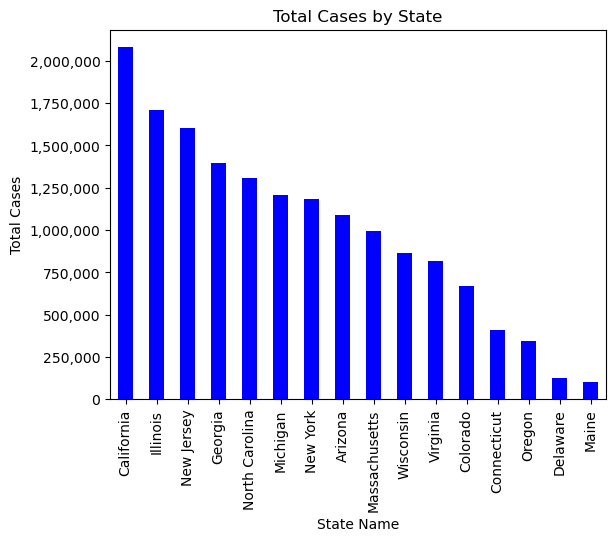

In [51]:
blue_states_2 = blue_states_df.groupby("State Name").mean(numeric_only=True)["Total Cases"]

blue_states_mean = blue_states_2.sort_values(ascending=False)

blue_states_mean.plot(kind = "bar",
                    xlabel="State Name",
                    ylabel="Total Cases",
                     title="Total Cases by State",
                    color="b")

plt.gca().yaxis.set_major_formatter('{:,.0f}'.format)

plt.show()
